In [59]:
import pandas as pd
import datetime as dt
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from  scipy.stats import skew, kurtosis, shapiro


In [60]:
path_demand = "../../Data/CSV_Files/Gas_Demand_Tot.csv"
path_temps = "../../Data/CSV_Files/Temperature_New_York_M.csv"
temps=pd.read_csv(path_temps, sep=",")
temps["Date"] =  pd.to_datetime(temps["Date"])
temps.set_index("Date",inplace=True)
temps = temps.rename(columns={"Temperature(F)":"temps"})
data = pd.read_csv(path_demand, sep=",")
data["Date"] =  pd.to_datetime(data["Date"])
data.set_index("Date",inplace=True)
data = data[["Consumption(Bscf)"]]
data = data.rename(columns={"Consumption(Bscf)":"energy"})
data=data.merge(temps,how='inner',on='Date')
data.info()
data.sort_values(by=['Date'], inplace=True, ascending=False)
data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 2019-04-01 to 2008-07-01
Data columns (total 2 columns):
energy    130 non-null float64
temps     130 non-null float64
dtypes: float64(2)
memory usage: 3.0 KB


,energy,temps
Date,,
2019-04-01,2182.901,56.633333
2019-03-01,2882.561,40.161290
2019-02-01,2983.892,35.321429
2019-01-01,3379.295,32.532258
2018-12-01,2958.554,39.580645


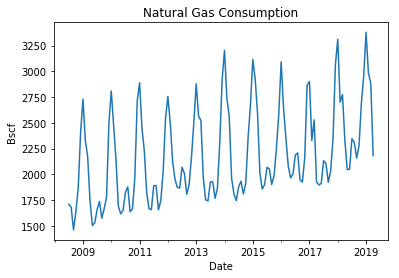

In [4]:
data['energy'].plot(title="Natural Gas Consumption")
plt.ylabel("Bscf")
plt.show()


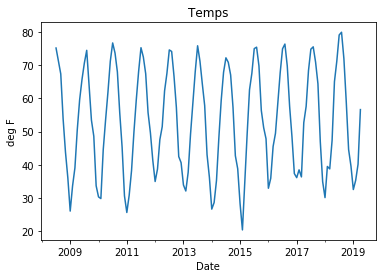

In [7]:
data['temps'].plot(title="Temps")
plt.ylabel("deg F")
plt.show()

In [8]:
data["year"] = data.index.year
data["qtr"] = data.index.quarter
data["month"] = data.index.month
data["ix"] = range(0,len(data))
data["log(energy)"]=np.log(data["energy"])
data["log(temps)"]=np.log(data["temps"])
data.head()


,energy,temps,year,qtr,month,ix,log(energy),log(temps)
Date,,,,,,,,
2019-04-01,2182.901,56.633333,2019,2,4,0,7.688410,4.036598
2019-03-01,2882.561,40.161290,2019,1,3,1,7.966434,3.692904
2019-02-01,2983.892,35.321429,2019,1,2,2,8.000984,3.564490
2019-01-01,3379.295,32.532258,2019,1,1,3,8.125422,3.482232
2018-12-01,2958.554,39.580645,2018,4,12,4,7.992456,3.678340


# Target Analyisis: Normality

In [22]:
mean_of_log = data["log(energy)"].mean()
std_of_log = data["log(energy)"].std()
skew_of_log = data["log(energy)"].skew()
ex_kurt_of_log = data["log(energy)"].kurtosis()

mean_of_temp_log = data["log(temps)"].mean()
std_of_temp_log = data["log(temps)"].std()
skew_of_temp_log = data["log(temps)"].skew()
ex_kurt_of_temp_log = data["log(temps)"].kurtosis()

mean = data["energy"].mean()
std = data["energy"].std()
skew = data["energy"].skew()
ex_kurt = data["energy"].kurtosis()

mean_temp = data["temps"].mean()
std_temp = data["temps"].std()
skew_temp = data["temps"].skew()
ex_kurt_temp = data["temps"].kurtosis()

print(f"Mean: {mean} \n Std: {std} \n Skew: {skew} \n Kurtosis: {ex_kurt+3}")
print(f"Mean of log of data: {mean_of_log} \n Std of log of data: {std_of_log} \n Skew of log of data: {skew_of_log} \n Kurtosis of log of data: {ex_kurt_of_log+3}")

Mean: 2182.3205999999996 
 Std: 444.38522015317176 
 Skew: 0.6856316897170204 
 Kurtosis: 2.594228641043951
Mean of log of data: 7.668542782872436 
 Std of log of data: 0.19671767789705458 
 Skew of log of data: 0.3664918347391515 
 Kurtosis of log of data: 2.2237906059946924


In [10]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(data["log(energy)"], alpha=0.05)


H0: Data was drawn from a Normal Ditribution
pval 0.002559707034379244 is lower than significance level: 0.05, therefore null hypothesis is rejected


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


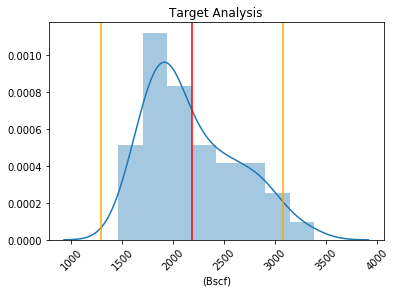

In [23]:
# histogram of unaltered data
sns.distplot(data["energy"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(Bscf)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


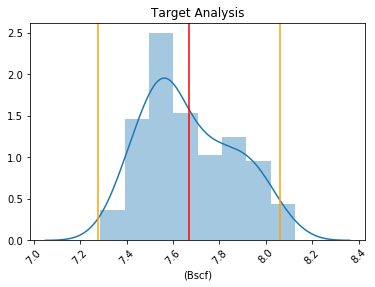

In [24]:
# histogram of log of data
sns.distplot(data["log(energy)"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(Bscf)")
plt.axvline(x=mean_of_log, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean_of_log))
plt.axvline(x=mean_of_log+2*std_of_log, color='orange', linestyle='-')
plt.axvline(x=mean_of_log-2*std_of_log, color='orange', linestyle='-')
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


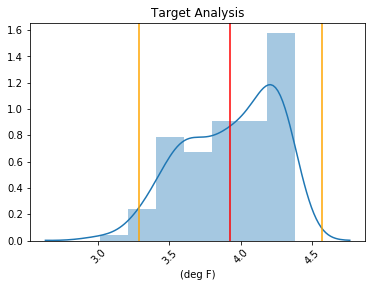

In [25]:
# histogram of log of price
sns.distplot(data["log(temps)"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(deg F)")
plt.axvline(x=mean_of_temp_log, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean_of_price_log))
plt.axvline(x=mean_of_temp_log+2*std_of_temp_log, color='orange', linestyle='-')
plt.axvline(x=mean_of_temp_log-2*std_of_temp_log, color='orange', linestyle='-')
plt.show()

Broadly speaking, data does not look like a normal distribution, because it has a small left tail and the chance of observing extreme values is smaller, comparing to normally distributed data

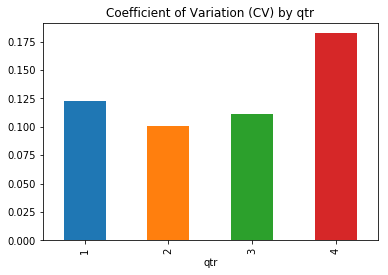

In [26]:
data.groupby("qtr")["energy"].std().divide(data.groupby("qtr")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by qtr")
plt.show()


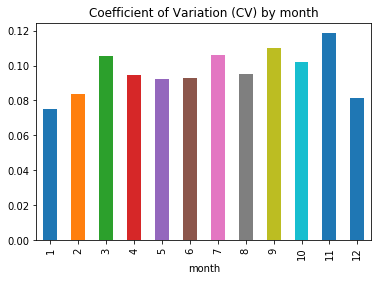

In [15]:
data.groupby("month")["energy"].std().divide(data.groupby("month")["energy"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by month")
plt.show()


# Time Series Analysis: Seasonality and Trend

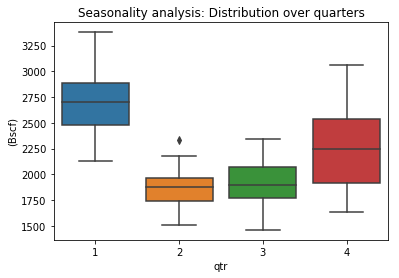

In [16]:
sns.boxplot(data=data, x="qtr", y="energy")
plt.title("Seasonality analysis: Distribution over quarters")
plt.ylabel("(Bscf)")
plt.show()


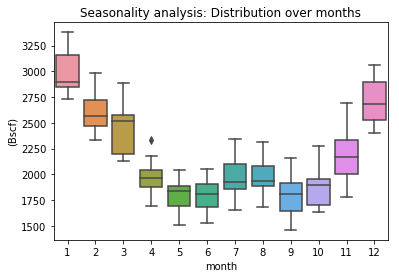

In [17]:
sns.boxplot(data=data, x="month", y="energy")
plt.title("Seasonality analysis: Distribution over months")
plt.ylabel("(Bscf)")
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


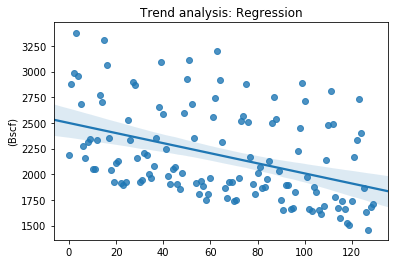

In [18]:
sns.regplot(data=data,x="ix", y="energy")
plt.title("Trend analysis: Regression")
plt.ylabel("(Bscf)")
plt.xlabel("")
plt.show()


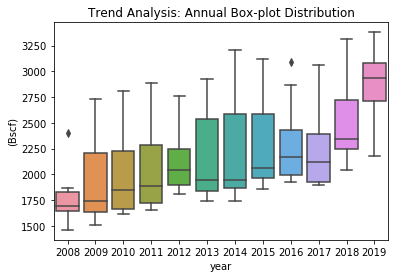

In [19]:
sns.boxplot(data=data, x="year", y="energy")
plt.title("Trend Analysis: Annual Box-plot Distribution")
plt.ylabel("(Bscf)")
plt.show()


# Feature Engineering

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


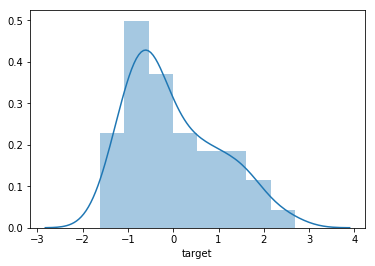

In [27]:
data["target"] = data["energy"].add(-mean).div(std)
data["normalized_temp"] = data["temps"].add(-mean_temp).div(std_temp)
sns.distplot(data["target"])
plt.show()


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


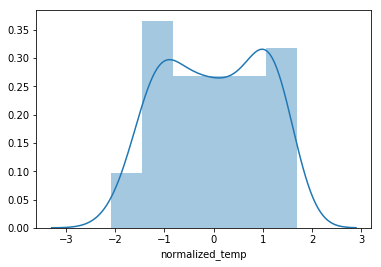

In [28]:
sns.distplot(data["normalized_temp"])
plt.show()

In [29]:
shapiro_test(data.target, alpha=0.05)


H0: Data was drawn from a Normal Ditribution
pval 2.0286288417992182e-05 is lower than significance level: 0.05, therefore null hypothesis is rejected


In [30]:
features = []
corr_features=[]
targets = []
tau = 12 #forecasting periods
    
data["target_t0"] = data["target"]
targets.append("target_t0")
    
for t in range(1, tau+1):
    data["feat_ar" + str(t)] = data["target"].shift(-t) 
    data["feat_temp" + str(t)] = data["normalized_temp"].shift(-t) 
    features.append("feat_ar" + str(t))
    features.append("feat_temp" + str(t))
    
features.append("normalized_temp")

In [31]:
months = pd.get_dummies(data["month"],
                              prefix="month",
                              drop_first=False)

months.index = data.index
data = pd.concat([data, months], axis=1)

print(months.columns.values.tolist())

['month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']


In [32]:
features_months = features + months.columns.values.tolist()
features

['feat_ar1',
 'feat_temp1',
 'feat_ar2',
 'feat_temp2',
 'feat_ar3',
 'feat_temp3',
 'feat_ar4',
 'feat_temp4',
 'feat_ar5',
 'feat_temp5',
 'feat_ar6',
 'feat_temp6',
 'feat_ar7',
 'feat_temp7',
 'feat_ar8',
 'feat_temp8',
 'feat_ar9',
 'feat_temp9',
 'feat_ar10',
 'feat_temp10',
 'feat_ar11',
 'feat_temp11',
 'feat_ar12',
 'feat_temp12',
 'normalized_temp']

In [33]:
corr = data[targets + features].corr()
print(corr)

                 target_t0  feat_ar1  feat_temp1  feat_ar2  feat_temp2  \
target_t0         1.000000  0.760457   -0.589610  0.362150   -0.283031   
feat_ar1          0.760457  1.000000   -0.751033  0.768029   -0.591251   
feat_temp1       -0.589610 -0.751033    1.000000 -0.671783    0.847732   
feat_ar2          0.362150  0.768029   -0.671783  1.000000   -0.750123   
feat_temp2       -0.283031 -0.591251    0.847732 -0.750123    1.000000   
feat_ar3         -0.029774  0.367236   -0.427854  0.762886   -0.670583   
feat_temp3        0.119367 -0.284642    0.491997 -0.585828    0.846943   
feat_ar4         -0.243718 -0.030061   -0.073256  0.346949   -0.424116   
feat_temp4        0.494771  0.119906    0.011431 -0.272710    0.488112   
feat_ar5         -0.283417 -0.246616    0.312496 -0.054720   -0.062202   
feat_temp5        0.738096  0.496090   -0.471320  0.132806    0.005677   
feat_ar6         -0.271001 -0.284802    0.605253 -0.266780    0.323630   
feat_temp6        0.765156  0.738907  

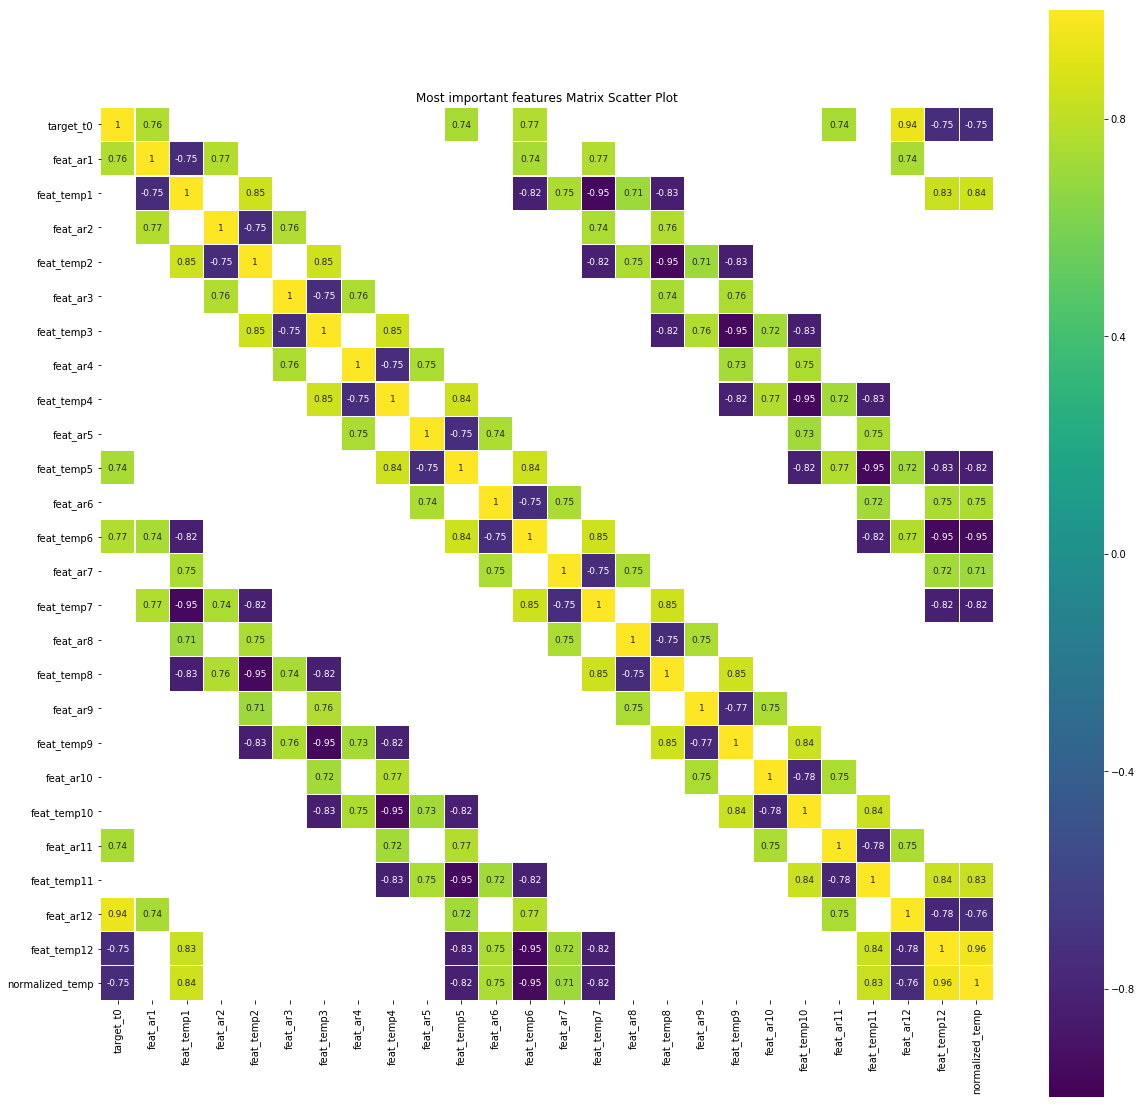

In [35]:
top5_mostCorrFeats = corr["target_t0"].apply(abs).sort_values(ascending=False).index.values[:6]
# sns.pairplot(data=data[top5_mostCorrFeats].dropna(), kind="reg")
plt.figure(figsize=(20,20))
Corr_thr_DepVSInd = 0.7
sns.heatmap(corr[(corr >= Corr_thr_DepVSInd) | (corr <= -Corr_thr_DepVSInd)],
          cmap="viridis",vmax=1.0, vmin=-1.0, linewidths=0.1,
          annot=True,annot_kws={"size":9},square=True)

plt.title("Most important features Matrix Scatter Plot")
plt.show()

There are some features that are quite strongly linearly correlated with target, like AR_6 and MOVAVE_7, let's build some models and check this assumption

# Model Building

In this step, two candidates models are build using an nice feature in Scikit-Learn such us MultiOutput Regression, it provides a framework to automatically and easily fit models to predict several target variables. (https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html)

First a baseline model (linear regression) will be fit and compared to a more advanced model, like Random Forest. A linear model does not need hyperparamenter tunning, and there is some correlation in data, so it is a strongh foundation, but there are several caveats:

- Target variable is not perfectly normally distributed with constant variance

- There are a lot of multicollinearity among predictors

- Observations are not independent

On the other hand an advanced model, like Random Forest, needs to perform hyperparamenter tunning, tipically it is solved by using GridSearch and Cross Validation, but time series data is not suitable to be used in CV, because data is shuffled in order to build k-folds. On the other hand, Scikit-Learng provide us with a nice solution: TimeSeries Splits, that respect time structure of date and iterativelly allow us to perform GridSearch

In [37]:
data

,energy,temps,year,qtr,month,ix,log(energy),log(temps),target,normalized_temp,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-01,2182.901,56.633333,2019,2,4,0,7.688410,4.036598,0.001306,0.213596,...,0,1,0,0,0,0,0,0,0,0
2019-03-01,2882.561,40.161290,2019,1,3,1,7.966434,3.692904,1.575751,-0.832124,...,1,0,0,0,0,0,0,0,0,0
2019-02-01,2983.892,35.321429,2019,1,2,2,8.000984,3.564490,1.803776,-1.139380,...,0,0,0,0,0,0,0,0,0,0
2019-01-01,3379.295,32.532258,2019,1,1,3,8.125422,3.482232,2.693551,-1.316449,...,0,0,0,0,0,0,0,0,0,0
2018-12-01,2958.554,39.580645,2018,4,12,4,7.992456,3.678340,1.746758,-0.868986,...,0,0,0,0,0,0,0,0,0,1
2018-11-01,2687.995,44.583333,2018,4,11,5,7.896551,3.797360,1.137919,-0.551393,...,0,0,0,0,0,0,0,0,1,0
2018-10-01,2276.313,59.000000,2018,4,10,6,7.730312,4.077537,0.211511,0.363843,...,0,0,0,0,0,0,0,1,0,0
2018-09-01,2158.549,72.000000,2018,3,9,7,7.677192,4.276666,-0.053493,1.189142,...,0,0,0,0,0,0,1,0,0,0
2018-08-01,2311.370,79.951613,2018,3,8,8,7.745596,4.381422,0.290400,1.693946,...,0,0,0,0,0,1,0,0,0,0


In [38]:
data_feateng = data[["year"] + features + targets].dropna()
nobs= len(data_feateng)
print("Number of observations: ", nobs)


Number of observations:  118


Split Data

Data points in 2018 are used as a holdout data to perform a honest assessment of model performance and carry out some residual analysis (6 months)

Total number of observations:  118
Train: (90, 25)(90, 1), 
Test: (28, 25)(28, 1)


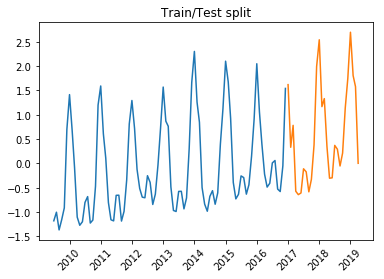

In [39]:
train_test_split = 2017
X_train = data_feateng[features].loc[data_feateng["year"]<train_test_split]
y_train = data_feateng[targets].loc[data_feateng["year"]<train_test_split]

X_test = data_feateng[features].loc[data_feateng["year"]>=train_test_split]
y_test = data_feateng[targets].loc[data_feateng["year"]>=train_test_split]


n, k = X_train.shape
print("Total number of observations: ", nobs)
print("Train: {}{}, \nTest: {}{}".format(X_train.shape, y_train.shape,
                                              X_test.shape, y_test.shape))

# plt.plot(y_train.index, y_train["target_t1.values"], label="train")
# plt.plot(y_test.index, y_test["target_t1.values"], label="test")

plt.plot(y_train.index, y_train["target_t0"], label="train")
plt.plot(y_test.index, y_test["target_t0"], label="test")

plt.title("Train/Test split")
plt.xticks(rotation=45)
plt.show()


Baseline Model: Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression().fit(X_train, y_train["target_t0"])
p_train = reg.predict(X_train)
p_test = reg.predict(X_test)

RMSE_train = np.sqrt(mean_squared_error(y_train["target_t0"], p_train))
RMSE_test = np.sqrt(mean_squared_error(y_test["target_t0"], p_test))
R2_train = r2_score(y_train["target_t0"], p_train)
R2_test = r2_score(y_test["target_t0"], p_test)

print("Train RMSE: {}\nTest RMSE: {}".format(RMSE_train, RMSE_test) )
print("Train R2: {}\nTest R2: {}".format(R2_train, R2_test) )



Train RMSE: 0.18956629337320677
Test RMSE: 0.35240951708065854
Train R2: 0.9581091631406171
Test R2: 0.8694312703140461


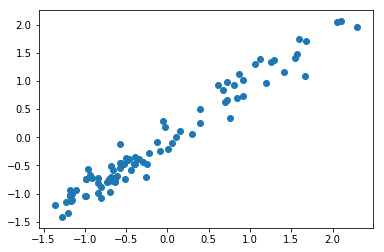

In [41]:
plt.scatter(y_train["target_t0"], p_train, label="train")


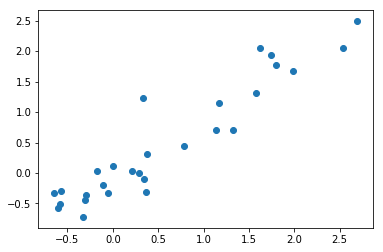

In [42]:
plt.scatter(y_test["target_t0"], p_test, label="test")


Train a Random Forest with Time Series Split to tune Hyperparameters

In this example, TimeSeriesSplit framework is shown, on each fold, train data is closer to the beginning of forecasting period

TRAIN: 24 TEST: 22


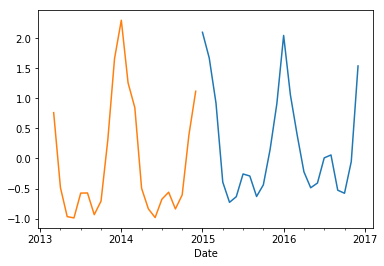

TRAIN: 46 TEST: 22


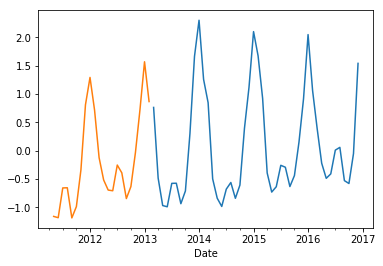

TRAIN: 68 TEST: 22


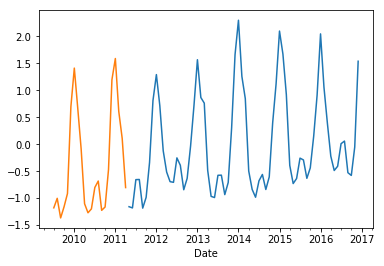

In [43]:
from sklearn.model_selection import TimeSeriesSplit, ParameterGrid

splits = TimeSeriesSplit(n_splits=3, max_train_size=365*2)
for train_index, val_index in splits.split(X_train):
    print("TRAIN:", len(train_index), "TEST:", len(val_index))
    y_train["target_t0"][train_index].plot()
    y_train["target_t0"][val_index].plot()
    plt.show()
    

In [44]:
from sklearn.ensemble import RandomForestRegressor

def TimeSplit_ModBuild(model, paramGrid, splits, X, y):
    from sklearn.model_selection import TimeSeriesSplit
    from sklearn.metrics import mean_squared_error

    #Loop over each time split and for each
    for train_index, val_index in splits.split(X_train):
        _X_train_ = X.iloc[train_index]
        _y_train_ = y.iloc[train_index]
        _X_val_ = X.iloc[val_index]
        _y_val_ = y.iloc[val_index]

        train_scores = []
        val_scores = []
        #models = []
        
        # Loop through the parameter grid, set the hyperparameters, and save the scores
        for g in paramGrid:
            model.set_params(**g)
            model.fit(_X_train_, _y_train_)
            p_train = model.predict(_X_train_)
            p_val = model.predict(_X_val_)
            score_train = np.mean(mean_squared_error(_y_train_, p_train))
            score_val = np.mean(mean_squared_error(_y_val_, p_val))
            train_scores.append(score_train)
            val_scores.append(score_val)
            #models.append(model)
            best_idx = np.argmin(val_scores)
            
        print("Best-Fold HyperParams:: ", paramGrid[best_idx])
        print("Best-Fold Train RMSE: ", train_scores[best_idx])
        print("Best-Fold Val RMSE: ",val_scores[best_idx])
        print("\n")
        
    #Return most recent model
    return train_scores, val_scores, best_idx

splits = TimeSeriesSplit(n_splits=3, max_train_size=12*2)
rfr = RandomForestRegressor()
# Create a dictionary of hyperparameters to search
rfr_grid = {"n_estimators": [500], 
        'max_depth': [3, 5, 10, 20, 30 ,40, 50], 
        'max_features': [10, 8, 5, 20, 15], 
        'random_state': [123]}
rfr_paramGrid = ParameterGrid(rfr_grid)

CV_rfr_tup = TimeSplit_ModBuild(rfr, rfr_paramGrid, splits, X_train, y_train["target_t0"])

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 20, 'max_depth': 10}
Best-Fold Train RMSE:  0.015800523008744256
Best-Fold Val RMSE:  0.13365018943755913


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 15, 'max_depth': 3}
Best-Fold Train RMSE:  0.010633106219752156
Best-Fold Val RMSE:  0.12379108560827991


Best-Fold HyperParams::  {'random_state': 123, 'n_estimators': 500, 'max_features': 20, 'max_depth': 3}
Best-Fold Train RMSE:  0.014959061576774941
Best-Fold Val RMSE:  0.10238244916181521




In [45]:
CV_rfr_tup[2]


3

In [46]:
rfr_paramGrid[CV_rfr_tup[2]]


{'random_state': 123, 'n_estimators': 500, 'max_features': 20, 'max_depth': 3}

In [47]:
best_rfr_idx = CV_rfr_tup[2]
best_rfr_grid = rfr_paramGrid[best_rfr_idx]
best_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
    fit(X_train, y_train["target_t0"])



Feature importance

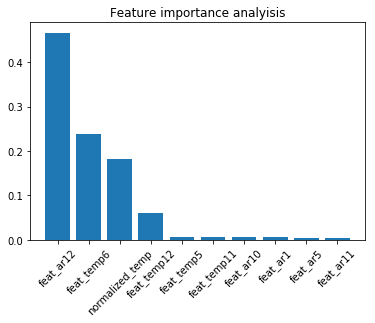

In [48]:
# Get feature importances from our random forest model
importances = best_rfr.feature_importances_

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
sorted_index_top = sorted_index[:10]
x = range(len(sorted_index_top))

# Create tick labels 
labels = np.array(features)[sorted_index_top]
plt.bar(x, importances[sorted_index_top], tick_label=labels)
plt.title("Feature importance analyisis")
# Rotate tick labels to vertical
plt.xticks(rotation=45)
plt.show()


# Model Assessment:

Performance Metrics: MAPE (Mean Absolute Percent Error)

Even though RMSE is a very common performance metric, MAPE is very suitable to use, and much easer to understand and communicate. Let's use one period ahead model to compute MAPE in test period

In [49]:
p_train = best_rfr.predict(X_train)
train_resid_1step = y_train["target_t0"]- p_train

p_test = best_rfr.predict(X_test)
test_resid_1step = y_test["target_t0"]- p_test



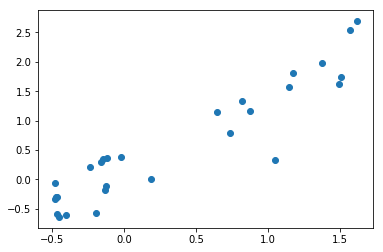

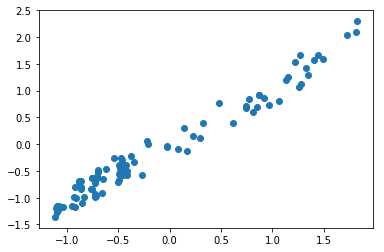

In [50]:
plt.scatter(p_test, y_test["target_t0"])
plt.show()
plt.scatter(p_train, y_train["target_t0"])
plt.show()



In [51]:
test_df = y_test[["target_t0"]]*std+mean
test_df["pred_t0"] = p_test*std+mean
test_df["resid_t0"] = test_df["target_t0"].add(-test_df["pred_t0"])
test_df["abs_resid_t0"] = abs(test_df["resid_t0"])
test_df["ape_t0"] = test_df["resid_t0"].div(test_df["target_t0"])
test_MAPE = test_df["ape_t0"].mean()*100
print("1-period ahead forecasting MAPE: ", test_MAPE)



1-period ahead forecasting MAPE:  3.721995192561271


In [52]:
train_df = y_train[["target_t0"]]*std+mean
train_df["pred_t0"] = p_train*std+mean

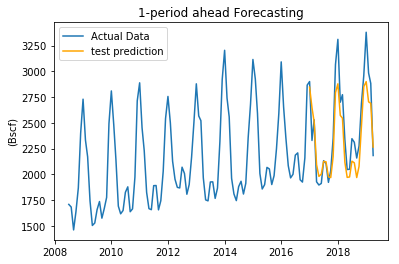

In [53]:
plt.plot(data["energy"], label="Actual Data")
# plt.plot(test_df[["target_t0"]], label="test data", color="b")
plt.plot(test_df[["pred_t0"]], label="test prediction", color="orange")

plt.title("1-period ahead Forecasting")
plt.ylabel("(Bscf)")
plt.legend()
plt.show()


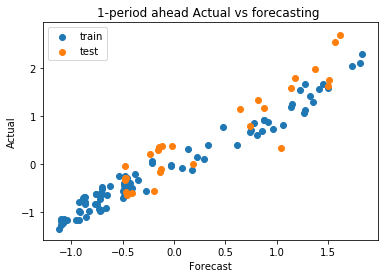

In [54]:
plt.scatter(y=y_train["target_t0"],x=p_train, label="train")
plt.scatter(y=y_test["target_t0"],x=p_test, label="test")
plt.title("1-period ahead Actual vs forecasting ")
plt.ylabel("Actual")
plt.xlabel("Forecast")
plt.legend()
plt.show()


Plotting actual vs forecasted provides a glance on how good model can fit train data and generalize to test data

# Residual Analysis

In order to perform a comprehensive exercise, a residual analysis is carried out, in order to verify:

- Is there some skewness in forecasting (tendendy to over or under forecast)?
     - Verify that residuals are normally distributed
- Does outliers impact on performance? Is there any information remaining on residuals?
    - Residual over time
    - Plot Residual vs Actual

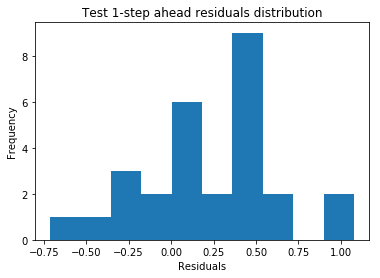

In [55]:
test_resid_1step.plot.hist(bins=10, title="Test 1-step ahead residuals distribution")
plt.xlabel("Residuals")
plt.show()


H0: Data was drawn from a Normal Ditribution
pval 0.7418985962867737 is higher than significance level: 0.05, therefore null hypothesis cannot be rejected


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


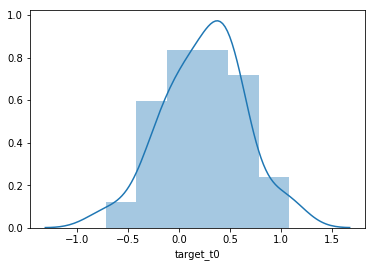

In [56]:
sns.distplot(test_resid_1step)
shapiro_test(test_resid_1step, alpha=0.05)


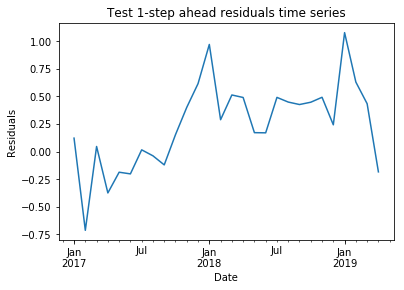

In [58]:
test_resid_1step.plot(title="Test 1-step ahead residuals time series")
plt.ylabel("Residuals")
plt.show()


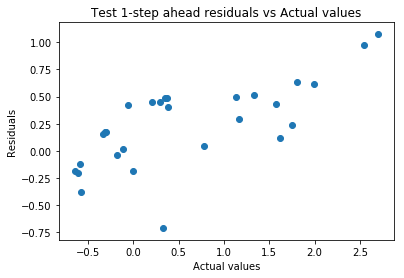

In [57]:
plt.scatter(x=y_test["target_t0"].values, y=test_resid_1step.values)
plt.title("Test 1-step ahead residuals vs Actual values")
plt.ylabel("Residuals")
plt.xlabel("Actual values")
plt.show()


Muti-period ahead model building

Once we know the best hiperparam set, a new instance of the RF model can be fit on the most recent (and relevant) data. Usually, it is considered that at least 2 years are needed in order to produce a long term daily forecast. Let's re-train a family of RF models using MultiOutput Regressor feature.

In [ ]:
# multi_rfr = RandomForestRegressor().set_params(**best_rfr_grid).\
#     fit(X_train, y_train['target_t0'])


In [ ]:
# p_train = multi_rfr.predict(X_train)
# train_resid_1step = y_train['target_t0']- p_train

# p_test = multi_rfr.predict(X_test)
# test_resid_1step = y_test['target_t0']- p_test


Performance Metrics: MAPE (Mean Absolute Percent Error)

Lastly, it is necesary to test forecasting accuracy in several periods, and assess whether it is stable.

In [ ]:
# periods = [1, 2, 3, 4]

# ytest_df = y_test['target_t0']*std+mean
# ptest_df = pd.DataFrame(data=p_test*std+mean, index=test_df.index, columns=["pred_t" + str(i) for i in range(1, 13)])
# test_df = pd.concat([ytest_df, ptest_df], axis=1)

# test_MAPE = []

# for t in periods:
#     test_df["resid_t" + str(t)] = test_df["target_t" + str(t)].add(-test_df["pred_t" + str(t)])
#     test_df["abs_resid_t" + str(t)] = abs(test_df["resid_t" + str(t)])
#     test_df["ape_t" + str(t)] = test_df["abs_resid_t" + str(t)].div(test_df["target_t" + str(t)])
#     test_MAPE.append(round(test_df["ape_t" + str(t)].mean(), 4)*100)

# print("MAPE test: ", test_MAPE)


In [ ]:
# mape_df = pd.DataFrame(index=periods, data={"test_MAPE": test_MAPE})
# mape_df.plot(kind="bar", legend=False)
# plt.title("Mean Absolute Percent Error in Test")
# plt.xlabel("Forecasting Period")
# plt.ylabel("%")
# plt.xticks(rotation=0)
# plt.show()


Not surprisingly, forecasting accuacy on 1 period INCREASES, more data, not always is better. Moreover, MAPE increases with forecasting horizon, but it seems quite stable.

Actual vs Forecasted

As previously stated, a quick way to assess model fit is to plot actual vs forecasted and take a glance at data scattering

In [ ]:
# #f, ax = plt.subplots(nrows=3,ncols=2)
# for t in periods:
#     test_df[["target_t" + str(t), "pred_t" + str(t)]].plot(x="pred_t" + str(t), y="target_t" + str(t) ,kind="scatter")
#     plt.title("{}-period(s) ahead forecasting".format(t))
#     plt.xlabel("Forecasted (MWh)")
#     plt.ylabel("Actual values (MWh)")
#     plt.xticks(rotation=45)
#     plt.show()

It can be seen that, as forecasting period is longer, scattering is greater, specially for extreme values

# Forecasting 30-days ahead

In [ ]:
# test_df.index = test_df.index.date


In [ ]:
# forecast_range = pd.date_range(start=np.max(test_df.index.values), periods=2*tau, freq="D")
# len(forecast_range)

In [ ]:
# forecast = []
# for t in range(0, tau):
#     #print(-(t+1), (t))
#     forecast = p_test[-(t+1):,(t)]*std+mean

In [ ]:
# t = 1
# p_test[-(t+1):,(t)]
# # p_test[-(t+1):]

In [ ]:
# p_test

In [ ]:
# test_df["target_t1"].plot()
# plt.scatter(x=test_df.index, y=test_df["pred_t1"], c="r", alpha=0.2, label="test preds")
# plt.plot(forecast_range, forecast, c="r", alpha=0.5, label="forecasting")
# plt.ylabel("(MWh)")
# plt.xticks(rotation=45)
# plt.title("Forecasting Daily Electricity Consumption (MWh) in Spanish Market (2018)")
# plt.show()

In [ ]:
# plt.plot(forecast_range, forecast, c="r", alpha=0.5, label="forecasting")
# plt.ylabel("(MWh)")
# plt.xticks(rotation=45)
# plt.title("Forecasting Daily Electricity Consumption (MWh) in Spanish Market (2018)")
# plt.show()

In [ ]:
# np.max(test_df.index.values)

In [ ]:
# forecast_range